# Machine Learning: Session 2

## Regression, regularization and cross-validation

In this task you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

In [34]:
import pandas as pd
import sklearn
import numpy as np

CRED = '\033[91m'
CEND = '\033[0m'

data = pd.read_csv("data.csv", index_col = 0)

In [35]:
##### YOUR CODE STARTS ##### (please do not delete this line)
X = data.drop(columns = ['y'])
y = data['y']

from sklearn.model_selection import train_test_split
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)
print("x_train shape:", X_train.shape, "x_test shape:", X_test.shape, "y_train shape:", y_train.shape, "y_test shape:", y_test.shape)

x_train shape: (100, 99) x_test shape: (100, 99) y_train shape: (100,) y_test shape: (100,)


In [36]:
##### YOUR CODE ENDS ##### (please do not delete this line)

## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [37]:
##### YOUR CODE STARTS ##### (please do not delete this line)

# column of ones to X_train for the intercept
X_train_intercept = np.c_[np.ones(X_train.shape[0]), X_train] 

# Coefficients = (X^T * X)^-1 * X^T * y  ==> closed form solution
coefficients = np.linalg.inv(X_train_intercept.T @ X_train_intercept) @ X_train_intercept.T @ y_train

# Separate the intercept and feature coefficients
intercept = coefficients[0]    # First value is the intercept
feature_coefficients = coefficients[1:]  # Remaining are feature coefficients

In [38]:
first_five_my_ols_coefficients = feature_coefficients[:5]

In [39]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [40]:
print('Coefficients of five first features according to my OLS implementation:', first_five_my_ols_coefficients)

Coefficients of five first features according to my OLS implementation: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [41]:
##### YOUR CODE STARTS ##### (please do not delete this line)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

intercept_sklearn = lr.intercept_
coefficients_sklearn = lr.coef_
##### YOUR CODE ENDS ##### (please do not delete this line)

In [42]:
first_five_sklearn_ols_coefficients = coefficients_sklearn[:5]

In [43]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [44]:
print('Coefficients of five first features according to sklearn OLS implementation:', first_five_sklearn_ols_coefficients)

Coefficients of five first features according to sklearn OLS implementation: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients and intercept. </font>

You maybe won't get exactly the same results because of precision problems of floats so the idea is to compare if the values are equal up to some precision (e.g. check if the difference is less than 0.000001). If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [45]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_intercept = intercept
    my_coefficients = feature_coefficients
    sklearn_intercept = intercept_sklearn
    sklearn_coefficients = coefficients_sklearn
    precision = 0.000001
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_intercept - sklearn_intercept) < precision)
    for i in range(99):
        assert(abs(my_coefficients[i] - sklearn_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 1e-06


#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [46]:
from sklearn.metrics import mean_squared_error
def evaluate(regression_model_class_instance, trainX, trainY, testX, testY):
    print("\n#################\n")
    print(regression_model_class_instance, '\n')
    
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement RMSE for train and test sets.")
    tr_p = regression_model_class_instance.predict(trainX)
    te_p = regression_model_class_instance.predict(testX)

    rmse_tr = np.sqrt(mean_squared_error(trainY, tr_p))
    rmse_te =  np.sqrt(mean_squared_error(testY, te_p))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(lr, X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)


#################

LinearRegression() 

RMSE train: 1.814433505226601e-14
RMSE test: 7.7151311330274135


## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

Intuition behind the regularization: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [47]:
##### YOUR CODE STARTS ##### (please do not delete this line)

lambda_ridge = 1

X_train_intercept = np.c_[np.ones(X_train.shape[0]), X_train]  # Adding intercept

# (X^T * X + λ * I)^-1 * X^T * y
identity_matrix = np.eye(X_train_intercept.shape[1])

# Ridge coefficients using the formula
ridge_coefficients = np.linalg.solve(
    X_train_intercept.T @ X_train_intercept + lambda_ridge * identity_matrix,
    X_train_intercept.T @ y_train
)

# Separate the intercept and feature coefficients
ridge_intercept = ridge_coefficients[0]    # First value is the intercept
ridge_feature_coefficients = ridge_coefficients[1:]  # Remaining are feature coefficients

In [48]:
first_five_my_ridge_coefficients = ridge_feature_coefficients[:5]

In [49]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [50]:
print('Coefficients of five first features according to my ridge implementation:', first_five_my_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [7.91026896 7.37023604 6.97156822 6.03240044 4.42825097]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [51]:
##### YOUR CODE STARTS ##### (please do not delete this line)
from sklearn.linear_model import Ridge

ridge_model = Ridge(solver="cholesky", tol=0.000000000001)

ridge_model.fit(X_train, y_train)

ridge_intercept_sklearn = ridge_model.intercept_            # Intercept from sklearn model
ridge_coefficients_sklearn = ridge_model.coef_              # Coefficients from sklearn model

In [52]:
first_five_sklearn_ridge_coefficients = ridge_coefficients_sklearn[:5]

In [53]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [54]:
print('Coefficients of five first features according to my ridge implementation:', first_five_sklearn_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [7.9028966  7.36974365 6.97110025 6.02447226 4.4245448 ]


#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02. If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [55]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_ridge_intercept = ridge_intercept
    my_ridge_coefficients = ridge_feature_coefficients
    sklearn_ridge_intercept = ridge_intercept_sklearn
    sklearn_ridge_coefficients = ridge_coefficients_sklearn
    precision = 0.02
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_ridge_intercept - sklearn_ridge_intercept) < precision)
    for i in range(99):
        assert(abs(my_ridge_coefficients[i] - sklearn_ridge_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 0.02


#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [56]:
##### YOUR CODE STARTS ##### (please do not delete this line)
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

lasso_intercept = lasso_model.intercept_            # Intercept from sklearn Lasso model
lasso_coefficients = lasso_model.coef_              # Coefficients from sklearn Lasso model

In [57]:
first_five_sklearn_lasso_coefficients = lasso_coefficients[:5]

In [58]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [59]:
print('Coefficients of five first features according to sklearn lasso implementation:', first_five_sklearn_lasso_coefficients)

Coefficients of five first features according to sklearn lasso implementation: [6.94577472 5.59046803 5.11228019 3.00075122 2.42991249]


#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [60]:
try:
    print('Evaluation of sklearn ridge regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(ridge_model, X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    
    print('Evaluation of sklearn lasso regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(lasso_model, X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Evaluation of sklearn ridge regression model:

#################

Ridge(solver='cholesky', tol=1e-12) 

RMSE train: 0.5159376269540175
RMSE test: 4.446220364755541
Evaluation of sklearn lasso regression model:

#################

Lasso() 

RMSE train: 4.984130516628728
RMSE test: 5.400343154987264


## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has the best RMSE for Lasso (save both alpha and RMSE values).

In [61]:
def method_1(model,alphas,random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Calculate RMSE for Ridge and Lasso models.")
    _X_train, _X_val, _y_train, _y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_seed)
    best_alpha = None
    rmse = None
    best_rmse = float('inf')
    for alpha in alphas:
        model.set_params(alpha=alpha)
        model.fit(_X_train, _y_train)
        y_pred = model.predict(_X_val)
        rmse = np.sqrt(mean_squared_error(_y_val, y_pred))
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
    rmse = best_rmse
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    return best_alpha,rmse

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    ridge_alphas = np.linspace(0.01, 10, 100)
    lasso_alphas = np.linspace(0.01, 5, 100)
    best_alpha_ridge_1, rmse_ridge_1 = method_1(ridge_model, ridge_alphas, random_seed=seed)
    best_alpha_lasso_1, rmse_lasso_1 = method_1(lasso_model, lasso_alphas, random_seed=seed)
    print("Best alpha for Ridge:", best_alpha_ridge_1, "RMSE for Ridge:", rmse_ridge_1)
    print("Best alpha for Lasso:", best_alpha_lasso_1, "RMSE for Lasso:", rmse_lasso_1)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Best alpha for Ridge: 0.21181818181818182 RMSE for Ridge: 3.619506194735719
Best alpha for Lasso: 0.06040404040404041 RMSE for Lasso: 0.6865670399948179


#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [62]:
from sklearn.model_selection import KFold
def method_2(model,alphas,random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement 10-fold cross-validation.") 
    kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)
    best_alpha = None
    rmse=None
    best_rmse = float('inf')
    for alpha in alphas:
        model.set_params(alpha=alpha)  # Set model's alpha value
        
        # List to store RMSE values for each of the 10 folds
        fold_rmse_values = []

        # 10-fold cross-validation
        for train_index, val_index in kf.split(X_train):
            # training and validation sets for this fold
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            #  Train the model on the current fold's training data
            model.fit(X_train_fold, y_train_fold)
            
            # Predict on the validation set for this fold
            y_pred_fold = model.predict(X_val_fold)
            
            # Calculate RMSE for the current fold and store it
            fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
            fold_rmse_values.append(fold_rmse)

        #  Calculate the mean RMSE across all 10 folds
        mean_rmse = np.mean(fold_rmse_values)

        #  Update best alpha and RMSE if the current mean RMSE is lower
        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_alpha = alpha
    
    rmse = best_rmse
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    return best_alpha,rmse
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    ridge_alphas = np.linspace(0.01, 10, 100)
    lasso_alphas = np.linspace(0.01, 5, 100)
    best_alpha_lasso_2, rmse_lasso_2 = method_2(lasso_model, lasso_alphas, random_seed=seed)
    best_alpha_ridge_2, rmse_ridge_2 = method_2(ridge_model, ridge_alphas, random_seed=seed)
    print("Best alpha for Ridge:", best_alpha_ridge_2, "RMSE for Ridge:", rmse_ridge_2)
    print("Best alpha for Lasso:", best_alpha_lasso_2, "RMSE for Lasso:", rmse_lasso_2)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Best alpha for Ridge: 0.21181818181818182 RMSE for Ridge: 3.864831998133826
Best alpha for Lasso: 0.06040404040404041 RMSE for Lasso: 0.7472838567224847


## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

In [63]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [64]:
ridge_results_method_1 = []
ridge_results_method_2 = []

lasso_results_method_1 = []
lasso_results_method_2 = []

# Loop through random_state values from 0 to 9
for random_state in range(10):
    print(f"\nTrial {random_state}:")

    # Run Method 1 for Ridge and Lasso
    ridge_best_alpha_1, ridge_best_rmse_1 = method_1(ridge_model, ridge_alphas, random_seed=random_state)
    lasso_best_alpha_1, lasso_best_rmse_1 = method_1(lasso_model, lasso_alphas, random_seed=random_state)

    # Store the results for Method 1
    ridge_results_method_1.append((random_state, ridge_best_alpha_1, ridge_best_rmse_1))
    lasso_results_method_1.append((random_state, lasso_best_alpha_1, lasso_best_rmse_1))

    # Run Method 2 for Ridge and Lasso
    ridge_best_alpha_2, ridge_best_rmse_2 = method_2(ridge_model, ridge_alphas, random_seed=random_state)
    lasso_best_alpha_2, lasso_best_rmse_2 = method_2(lasso_model, lasso_alphas, random_seed=random_state)

    # Store the results for Method 2
    ridge_results_method_2.append((random_state, ridge_best_alpha_2, ridge_best_rmse_2))
    lasso_results_method_2.append((random_state, lasso_best_alpha_2, lasso_best_rmse_2))

    # Print results for this trial
    print(f"Ridge - Method 1: Best Alpha: {ridge_best_alpha_1}, RMSE: {ridge_best_rmse_1}")
    print(f"Ridge - Method 2: Best Alpha: {ridge_best_alpha_2}, RMSE: {ridge_best_rmse_2}")
    print(f"Lasso - Method 1: Best Alpha: {lasso_best_alpha_1}, RMSE: {lasso_best_rmse_1}")
    print(f"Lasso - Method 2: Best Alpha: {lasso_best_alpha_2}, RMSE: {lasso_best_rmse_2}")


Trial 0:
Ridge - Method 1: Best Alpha: 0.21181818181818182, RMSE: 3.619506194735719
Ridge - Method 2: Best Alpha: 0.21181818181818182, RMSE: 3.864831998133826
Lasso - Method 1: Best Alpha: 0.06040404040404041, RMSE: 0.6865670399948179
Lasso - Method 2: Best Alpha: 0.06040404040404041, RMSE: 0.7472838567224847

Trial 1:
Ridge - Method 1: Best Alpha: 0.01, RMSE: 4.030624058908054
Ridge - Method 2: Best Alpha: 0.31272727272727274, RMSE: 3.7406663398713214
Lasso - Method 1: Best Alpha: 0.06040404040404041, RMSE: 0.6251290073443008
Lasso - Method 2: Best Alpha: 0.06040404040404041, RMSE: 0.7497148067671707

Trial 2:
Ridge - Method 1: Best Alpha: 0.1109090909090909, RMSE: 4.158768566378859
Ridge - Method 2: Best Alpha: 0.21181818181818182, RMSE: 3.4401149895757825
Lasso - Method 1: Best Alpha: 0.06040404040404041, RMSE: 0.5368738453196877
Lasso - Method 2: Best Alpha: 0.06040404040404041, RMSE: 0.7637928241939728

Trial 3:
Ridge - Method 1: Best Alpha: 0.41363636363636364, RMSE: 3.691419366

In [65]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

**Answer:**
For stability, Method 2 (10-fold cross-validation) provides more reliable results compared to Method 1 (single train/validation split). In Ridge Regression, Method 2 consistently selects alpha values in a narrower range, showing less variability across trials. For Lasso Regression, both methods frequently select the same alpha (0.0604), but Method 2 still demonstrates higher consistency. Overall, Method 2 offers more stable information on which alpha to use, making it the preferred method. The best alpha values in the end for these data are around 0.1109 for Ridge and 0.0604 for Lasso, based on the majority of trials.

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

In [66]:
##### YOUR CODE STARTS ##### (please do not delete this line)

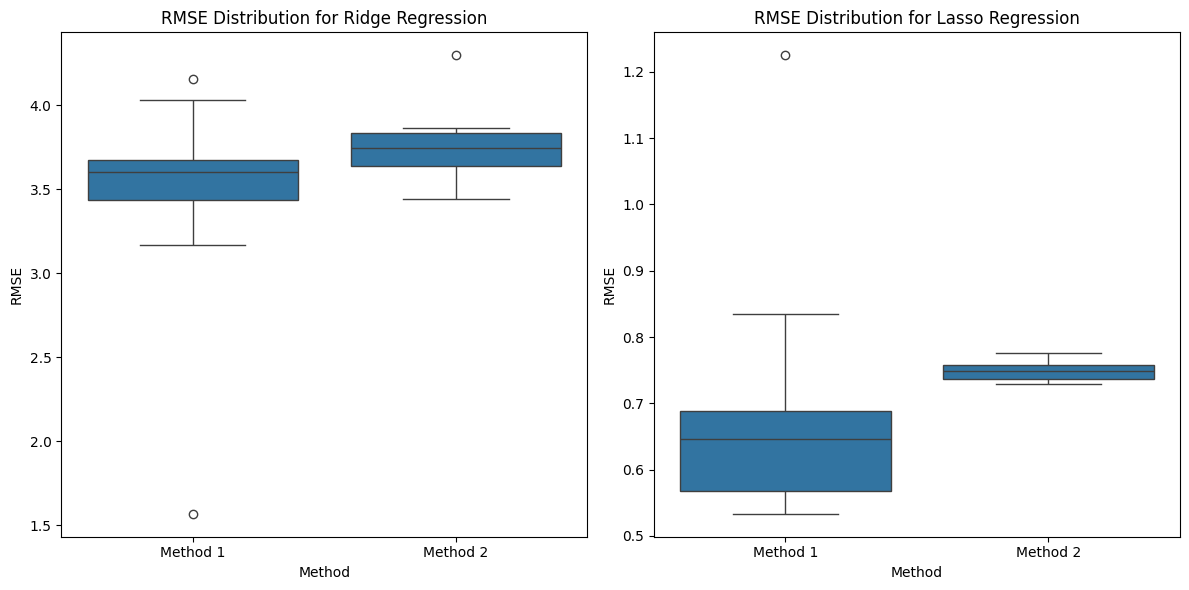

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract RMSE values
ridge_rmse_method_1 = [rmse for _, _, rmse in ridge_results_method_1]
ridge_rmse_method_2 = [rmse for _, _, rmse in ridge_results_method_2]

lasso_rmse_method_1 = [rmse for _, _, rmse in lasso_results_method_1]
lasso_rmse_method_2 = [rmse for _, _, rmse in lasso_results_method_2]

# DataFrames for visualization
ridge_rmse_df = pd.DataFrame({
    'RMSE': ridge_rmse_method_1 + ridge_rmse_method_2,
    'Method': ['Method 1'] * len(ridge_rmse_method_1) + ['Method 2'] * len(ridge_rmse_method_2),
    'Model': ['Ridge'] * (len(ridge_rmse_method_1) + len(ridge_rmse_method_2))
})

lasso_rmse_df = pd.DataFrame({
    'RMSE': lasso_rmse_method_1 + lasso_rmse_method_2,
    'Method': ['Method 1'] * len(lasso_rmse_method_1) + ['Method 2'] * len(lasso_rmse_method_2),
    'Model': ['Lasso'] * (len(lasso_rmse_method_1) + len(lasso_rmse_method_2))
})


plt.figure(figsize=(12, 6))

# Boxplot for Ridge Regression
plt.subplot(1, 2, 1)
sns.boxplot(x='Method', y='RMSE', data=ridge_rmse_df)
plt.title('RMSE Distribution for Ridge Regression')
plt.xlabel('Method')
plt.ylabel('RMSE')

# Boxplot for Lasso Regression
plt.subplot(1, 2, 2)
sns.boxplot(x='Method', y='RMSE', data=lasso_rmse_df)
plt.title('RMSE Distribution for Lasso Regression')
plt.xlabel('Method')
plt.ylabel('RMSE')

# Display the plots
plt.tight_layout()
plt.show()


In [68]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

**Answer:**
The boxplots show that Method 1 (single train-validation split) results in more variable RMSE values for both Ridge and Lasso regression, indicating sensitivity to random splits. This means that the results depend heavily on how the data is divided, leading to less consistent performance. In contrast, Method 2 (10-fold cross-validation) produces more stable and consistent RMSE values because it averages results over multiple splits, reducing the impact of any single split.

In general, K-fold cross-validation is a better choice for parameter tuning because it provides a more reliable estimate of model performance. It helps mitigate the risk of overfitting or underfitting that might occur with a single train-validation split. Thus, for tuning parameters like alpha in Ridge and Lasso, K-fold cross-validation should be preferred for its stability and robustness in selecting the best parameters.

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

In [69]:
##### YOUR CODE STARTS ##### (please do not delete this line)

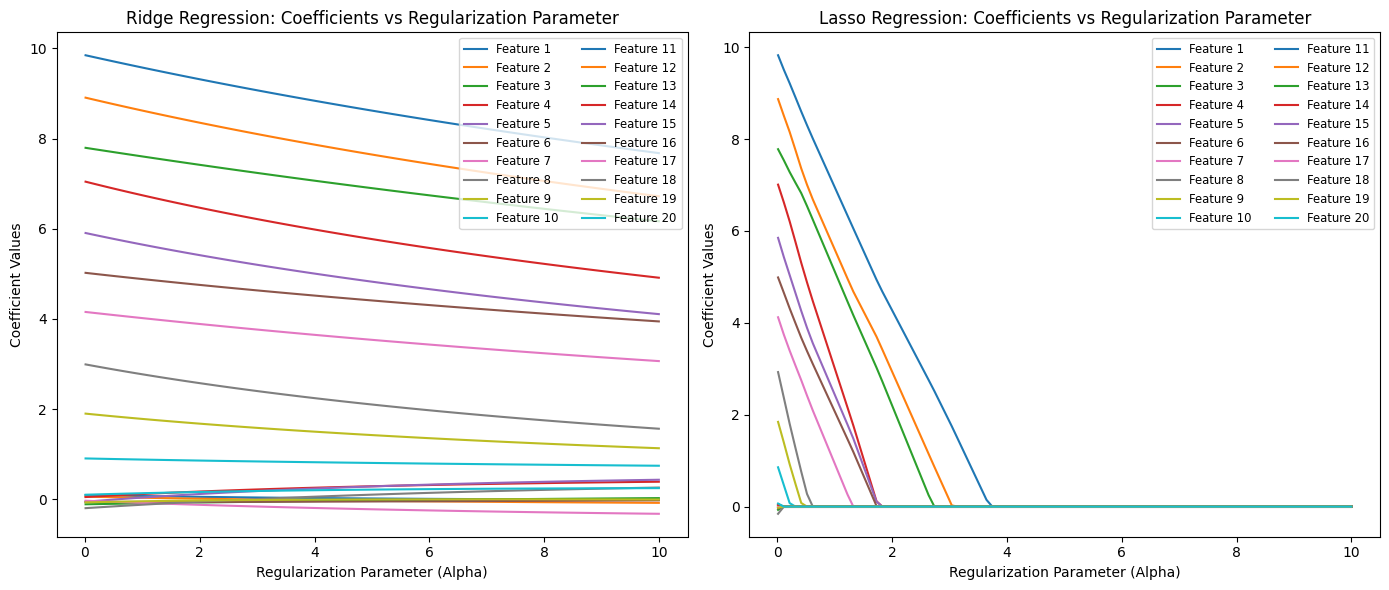

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso

# Select the first 20 features for visualization
num_features = 20
selected_features = X_train.columns[:num_features]

# Create alpha values to test (from 0.01 to 10, as per previous tasks)
alphas = np.linspace(0.01, 10, 100)

# Create arrays to store coefficients for each alpha
ridge_coefficients = np.zeros((len(alphas), num_features))
lasso_coefficients = np.zeros((len(alphas), num_features))

# Fit Ridge and Lasso models for each alpha and collect coefficients
for i, alpha in enumerate(alphas):
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    
    # Fit models on training data
    ridge_model.fit(X_train[selected_features], y_train)
    lasso_model.fit(X_train[selected_features], y_train)
    
    # Store coefficients for the first 20 features
    ridge_coefficients[i, :] = ridge_model.coef_
    lasso_coefficients[i, :] = lasso_model.coef_

# Plot the coefficients for Ridge Regression
plt.figure(figsize=(14, 6))

# Ridge Coefficients Plot
plt.subplot(1, 2, 1)
for feature_idx in range(num_features):
    plt.plot(alphas, ridge_coefficients[:, feature_idx], label=f'Feature {feature_idx+1}')
plt.title('Ridge Regression: Coefficients vs Regularization Parameter')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Coefficient Values')
plt.legend(loc='upper right', ncol=2, fontsize='small')

# Lasso Coefficients Plot
plt.subplot(1, 2, 2)
for feature_idx in range(num_features):
    plt.plot(alphas, lasso_coefficients[:, feature_idx], label=f'Feature {feature_idx+1}')
plt.title('Lasso Regression: Coefficients vs Regularization Parameter')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Coefficient Values')
plt.legend(loc='upper right', ncol=2, fontsize='small')

# Display the plots
plt.tight_layout()
plt.show()


**Summary**:

Ridge Regression shrinks all coefficients smoothly, retaining all features in the model.

Lasso Regression aggressively reduces many coefficients to zero, effectively performing feature selection and simplifying the model.

In [71]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

**Answer:**
Ridge and Lasso regression are both regularization techniques that prevent overfitting by adding a penalty to the loss function, but they differ in how they treat coefficients. Ridge uses an L2 penalty (sum of squared coefficients), which shrinks all coefficients towards zero but retains all features in the model. It’s useful when you want to reduce the influence of less important features without removing them entirely. Lasso, on the other hand, uses an L1 penalty (sum of absolute coefficients), which can shrink some coefficients exactly to zero, effectively removing irrelevant features and performing feature selection. As a result, Lasso creates simpler models by keeping only the most important features, while Ridge maintains all features with smaller coefficients.

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

In [72]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit and evaluate the non-regularized linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Calculate RMSE
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

###########################################################################################################################

# Fit and evaluate the Ridge regression model with the chosen alpha
ridge_model_best = Ridge(alpha= best_alpha_ridge_2)  # Use the best alpha found in subtask 4(b)
ridge_model_best.fit(X_train, y_train)

# Predictions
y_train_pred_ridge = ridge_model_best.predict(X_train)
y_test_pred_ridge = ridge_model_best.predict(X_test)

# Calculate RMSE
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

###########################################################################################################################

# Fit and evaluate the Lasso regression model with the chosen alpha
lasso_model_best = Lasso(alpha=lasso_best_alpha_2)  # Use the best alpha found in subtask 4(b)
lasso_model_best.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso_model_best.predict(X_train)
y_test_pred_lasso = lasso_model_best.predict(X_test)

# Calculate RMSE
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

###########################################################################################################################

# "Dumb" model that predicts the mean value of y_train
y_train_mean = np.mean(y_train)
y_train_pred_mean = np.full_like(y_train, y_train_mean)
y_test_pred_mean = np.full_like(y_test, y_train_mean)

# Calculate RMSE
rmse_train_mean = np.sqrt(mean_squared_error(y_train, y_train_pred_mean))
rmse_test_mean = np.sqrt(mean_squared_error(y_test, y_test_pred_mean))

###########################################################################################################################

# Ideal model with true coefficients
true_coefficients = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1] + [0] * (X_train.shape[1] - 10)
true_intercept = 0

# Generate predictions for training and testing sets using the true coefficients
y_train_pred_ideal = X_train @ true_coefficients + true_intercept
y_test_pred_ideal = X_test @ true_coefficients + true_intercept

# Calculate RMSE
rmse_train_ideal = np.sqrt(mean_squared_error(y_train, y_train_pred_ideal))
rmse_test_ideal = np.sqrt(mean_squared_error(y_test, y_test_pred_ideal))

###########################################################################################################################

# Display the RMSE results for all models
print("RMSE Comparison of Models:")
print(f"1. Non-regularized Linear Regression: Train RMSE = {rmse_train_linear:.4f}, Test RMSE = {rmse_test_linear:.4f}")
print(f"2. Ridge Regression (Best Alpha): Train RMSE = {rmse_train_ridge:.4f}, Test RMSE = {rmse_test_ridge:.4f}")
print(f"3. Lasso Regression (Best Alpha): Train RMSE = {rmse_train_lasso:.4f}, Test RMSE = {rmse_test_lasso:.4f}")
print(f"4. 'Dumb' Model (Mean Prediction): Train RMSE = {rmse_train_mean:.4f}, Test RMSE = {rmse_test_mean:.4f}")
print(f"5. Ideal Model (True Coefficients): Train RMSE = {rmse_train_ideal:.4f}, Test RMSE = {rmse_test_ideal:.4f}")


RMSE Comparison of Models:
1. Non-regularized Linear Regression: Train RMSE = 0.0000, Test RMSE = 7.7151
2. Ridge Regression (Best Alpha): Train RMSE = 0.2075, Test RMSE = 3.3837
3. Lasso Regression (Best Alpha): Train RMSE = 0.6219, Test RMSE = 0.8777
4. 'Dumb' Model (Mean Prediction): Train RMSE = 11.0471, Test RMSE = 11.3219
5. Ideal Model (True Coefficients): Train RMSE = 0.5749, Test RMSE = 0.6006


In [74]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

**Answer:**

The best results are achieved by Lasso Regression, as indicated by its lowest Test RMSE value of 0.8777.

Lasso outperformed other models because of its feature selection capability. It sets less important coefficients to zero, simplifying the model and retaining only the most relevant features. This results in a model that is less likely to overfit compared to non-regularized linear regression or Ridge regression, which keep all features regardless of their significance. By using only the most critical features, Lasso is able to generalize better to new data, which is why it had the lowest Test RMSE.

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one (baseline). What would it mean if the learned model would give worse results?

**Answer:**
Yes, all of the "smart" models (Non-regularized Linear Regression, Ridge, Lasso, and the Ideal model) performed significantly better than the "dumb" model (which always predicts the mean value of y_train). The "dumb" model had a high Test RMSE of 11.3219, while all the other models achieved much lower RMSE values, demonstrating their ability to capture patterns in the data beyond the baseline.

If a learned model produced worse results than the "dumb" model, it would indicate that the model is failing to learn any meaningful relationships in the data. This could happen if the model is highly overfitting, underfitting

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

**Answer:**
The learned models, especially Lasso and Ridge, were quite close to the ideal model in terms of performance, but not exact. The Ideal model had a Test RMSE of 0.6006, while Lasso had a Test RMSE of 0.8777 and Ridge had a Test RMSE of 3.3837. This indicates that Lasso came closest to the ideal model’s performance, while Ridge and the non-regularized model were further away.


Regarding the coefficients, Lasso was able to approximate the true coefficients better because of its feature selection property, which tends to push irrelevant coefficients to zero. However, it’s unlikely that the learned coefficients were exactly the same as the true ones, especially due to the regularization effects of Lasso and Ridge, which inherently modify coefficient values. Any differences between the learned coefficients and the true coefficients could be attributed to regularization and the presence of noise or complexity in the data that the ideal model does not account for.

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

**Answer:**
The non-regularized linear regression model overfitted the most. This is evident because it had a Train RMSE of 0.0000, indicating a perfect fit on the training data, but a much higher Test RMSE of 7.7151. The large gap between the train and test RMSE values shows that the model memorized the training data and failed to generalize to the test set. This is a clear sign of overfitting, as it performs extremely well on training data but poorly on unseen data.

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

**Answer:**
Regularized methods are not always better than non-regularized ones. Regularization is beneficial when the model is complex or the data is small and noisy, as it prevents overfitting. However, in large, clean datasets with strong features, non-regularized methods can perform just as well or even better. The choice depends on the data and should be based on model evaluation and cross-validation results.

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>